## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import pickle

In [2]:
df = pd.read_csv(r"C:\Users\achou\Desktop\practice\1. Project\1. Diamond Price Prediction\Dataset\diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.shape

(53940, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


##### In some of the cases min value of "x", "y", "z" are zero, this indicates that there are faulty values in df that represents dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty df points.

In [6]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

##### Clearly 20 df points had faulty dimension values and were thereby deleted

**A few points to notice in these pair plots**

There are some features with dfpoint that are far from the rest of the dfset which will affect the outcome of our regression model.

* "y" and "z" have some dimensional outlies in our dfset that needs to be eliminated.
* The "depth" should be capped but we must examine the regression line to be sure.
* The "table" featured should be capped too.
* Let's have a look at regression plots to get a close look at the outliers.

#### Dropping the outliers

In [7]:
#Dropping the outliers. 
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]
df.shape

(53907, 10)

In [8]:
# Creating a copy of the original df

df_copy = df.copy()

X= df_copy.drop(["price"],axis =1)
y= df_copy["price"]

In [9]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53907, dtype: int64

In [10]:
col_to_move = X['carat']
X.drop(['carat'], axis = 1, inplace = True)
X

,cut,color,clarity,depth,table,x,y,z
0,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [11]:
X.insert(X.shape[1], 'carat', col_to_move)
X

,cut,color,clarity,depth,table,x,y,z,carat
0,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,0.23
1,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,0.21
2,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,0.23
3,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,0.29
4,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,0.31
...,...,...,...,...,...,...,...,...,...
53935,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,0.72
53936,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,0.72
53937,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,0.70
53938,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,0.86


In [12]:
obj_cols = X.select_dtypes('object').columns.to_list()
numeric_cols = X.select_dtypes(include='number').columns.to_list()

print('obj cols: ', obj_cols)
print('num cols : ', numeric_cols)

obj cols:  ['cut', 'color', 'clarity']
num cols :  ['depth', 'table', 'x', 'y', 'z', 'carat']


##### Ordinal encoding the categorical variables

In [13]:
# Assigning the featurs as X and trarget as y

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

# Applying Ordinal Encoder to each column with categorical data

ordinal_encoder = OrdinalEncoder()
scaler = StandardScaler()

transformed_col = ColumnTransformer([ 
    ("cat", ordinal_encoder, obj_cols),
    ("num", scaler, numeric_cols)
])

X_train_array = transformed_col.fit_transform(X_train)
X_test_array = transformed_col.transform(X_test)

# Creating DataFrames with appropriate columns and indices
X_train_encoded = pd.DataFrame(X_train_array, columns= obj_cols + numeric_cols, index= X_train.index)
X_test_encoded = pd.DataFrame(X_test_array, columns= obj_cols + numeric_cols, index= X_test.index)

print("Encoded Training Data:\n", X_train_encoded.head())
print("Encoded Test Data:\n", X_test_encoded.head())

Encoded Training Data:
        cut  color  clarity     depth     table         x         y         z  \
8778   1.0    0.0      2.0 -2.269767  2.480835  0.424289  0.506856  0.171357   
47001  2.0    3.0      7.0  0.527631 -1.549589 -0.487662 -0.474803 -0.422164   
40421  0.0    4.0      4.0  3.394963  0.241710 -0.702239 -0.808027 -0.407688   
44023  2.0    1.0      2.0  0.317826 -0.206115 -0.550247 -0.591882 -0.537973   
13402  3.0    4.0      7.0  0.317826  0.241710 -1.256563 -1.222305 -1.203875   

          carat  
8778   0.213169  
47001 -0.567570  
40421 -0.630873  
44023 -0.609772  
13402 -1.010693  
Encoded Test Data:
        cut  color  clarity     depth     table         x         y         z  \
16087  2.0    0.0      2.0  0.597566 -0.653940  0.674629  0.704989  0.764878   
164    2.0    2.0      3.0  0.108021 -1.101764  0.209712  0.164626  0.200309   
5785   4.0    1.0      6.0 -0.381523  0.241710  0.013017  0.047548 -0.016833   
4703   4.0    2.0      0.0 -1.360612  1.585185 

In [14]:
X_train_encoded.describe()

,cut,color,clarity,depth,table,x,y,z,carat
count,40430.000000,40430.000000,40430.000000,4.043000e+04,4.043000e+04,4.043000e+04,4.043000e+04,4.043000e+04,4.043000e+04
mean,2.552609,2.596710,3.838734,-4.559213e-15,-8.198570e-16,-2.163438e-16,-6.379595e-17,-5.865536e-16,-3.321607e-17
std,1.030558,1.699473,1.725093,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,0.000000,0.000000,0.000000,-7.654756e+00,-6.475663e+00,-1.793005e+00,-1.852729e+00,-1.884252e+00,-1.263905e+00
25%,2.000000,1.000000,2.000000,-5.213932e-01,-6.539395e-01,-9.078753e-01,-9.070935e-01,-9.143523e-01,-8.418840e-01
50%,2.000000,3.000000,4.000000,3.808626e-02,-2.061146e-01,-3.168653e-02,-1.549472e-02,-1.683283e-02,-2.088520e-01
75%,3.000000,4.000000,5.000000,5.276308e-01,6.895351e-01,7.193324e-01,7.230012e-01,7.214493e-01,5.085842e-01
max,4.000000,6.000000,7.000000,8.290408e+00,8.302558e+00,4.474427e+00,4.325421e+00,4.977429e+00,8.885707e+00


In [15]:
df_corr = X_train_encoded.copy()
df_corr['price'] = y_train
df_corr

,cut,color,clarity,depth,table,x,y,z,carat,price
8778,1.0,0.0,2.0,-2.269767,2.480835,0.424289,0.506856,0.171357,0.213169,4469
47001,2.0,3.0,7.0,0.527631,-1.549589,-0.487662,-0.474803,-0.422164,-0.567570,1818
40421,0.0,4.0,4.0,3.394963,0.241710,-0.702239,-0.808027,-0.407688,-0.630873,1134
44023,2.0,1.0,2.0,0.317826,-0.206115,-0.550247,-0.591882,-0.537973,-0.609772,1546
13402,3.0,4.0,7.0,0.317826,0.241710,-1.256563,-1.222305,-1.203875,-1.010693,602
...,...,...,...,...,...,...,...,...,...,...
919,0.0,2.0,4.0,-3.388725,5.167784,0.173950,0.029536,-0.306355,-0.166650,2879
53492,3.0,2.0,2.0,-0.171719,0.241710,0.084543,0.119596,0.084500,-0.103347,2683
38492,3.0,2.0,4.0,-0.381523,0.241710,-0.818468,-0.790015,-0.841972,-0.799682,1031
10750,4.0,3.0,3.0,-1.080873,0.689535,0.862384,1.002189,0.779354,0.677393,4852


<Axes: >

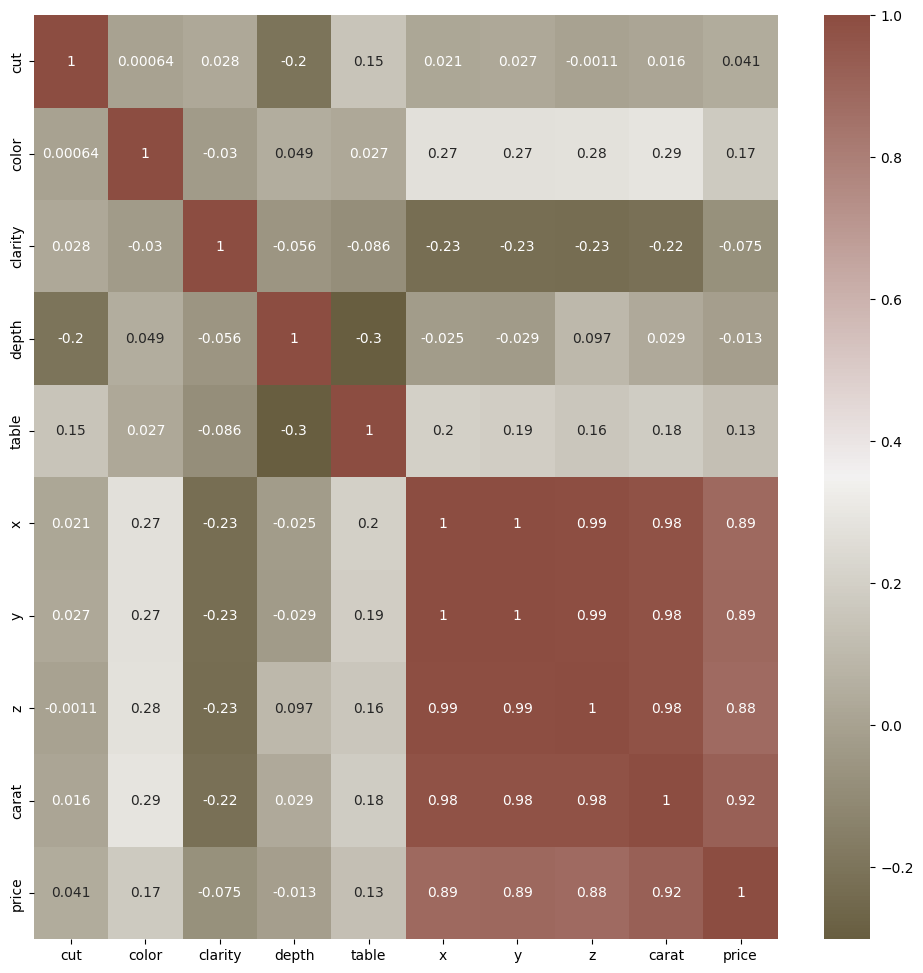

In [16]:
#correlation matrix

cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= df_corr.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

**Points to notice:**
* "x", "y", "z" & "carat" show a high correlation to the target column. 
* "depth", "cut" and "table" show low correlation. We could consider dropping but let's keep it. 



# Model Building

**Steps involved in Model Building**

* Setting up features and target
* Build a pipeline of standard scalar and model for five different regressors.
* Fit all the models on training data
* Get mean of cross-validation on the training set for all the models for negative root mean square error
* Pick the model with the best cross-validation score
* Fit the best model on the training set and get

In [17]:
#Building pipelins of standard scaler and model for various regressors.

lr_regressor = LinearRegression()

dt_regressor = DecisionTreeRegressor()

rf_regressor = RandomForestRegressor()

knn_regressor = KNeighborsRegressor()

xgb_regressor = XGBRegressor()

#List of all the models
models = [lr_regressor, dt_regressor, rf_regressor, knn_regressor, xgb_regressor]

#Dictionary of pipelines and model types for ease of reference
model_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

#Fit the models
for model in models:
    model.fit(X_train_encoded, y_train)


In [18]:
cv_results_rms = []
for i, model in enumerate(models):
    cv_score = cross_val_score(model, X_train_encoded, y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (model_dict[i], cv_score.mean()))


LinearRegression: -1348.811824 
DecisionTree: -755.979232 
RandomForest: -547.117861 
KNeighbors: -754.025523 
XGBRegressor: -547.885204 


**Testing the Model with the best score on the test set**

In the above scores, XGBClassifier appears to be the model with the best scoring on negative root mean square error. Let's test this model on a test set and evaluate it with different parameters. 

In [19]:
# Model prediction on test data
pred = xgb_regressor.predict(X_test_encoded)

In [20]:
# Model Evaluation

print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9804171297887829
Adjusted R^2: 0.9804040425509496
MAE: 279.8432502743751
MSE: 307212.6264525772
RMSE: 554.267648751555


In [21]:
with open('model.pkl', 'wb') as file:
    pickle.dump(xgb_regressor, file)

with open("ordinal_encoder.pkl", "wb") as file:
    pickle.dump(ordinal_encoder, file)

with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

with open("column_transformer.pkl", "wb") as f:
    pickle.dump(transformed_col, f)

In [22]:
import sklearn
import matplotlib
import seaborn
import sklearn
import xgboost

In [23]:
print('numpy', np.__version__)
print('pandas', pd.__version__)
print('matplotlib', matplotlib.__version__)
print('seaborn', sns.__version__)
print('scikitlearn', sklearn.__version__)
print('xgboost', xgboost.__version__)

numpy 1.24.2
pandas 2.2.2
matplotlib 3.7.1
seaborn 0.12.2
scikitlearn 1.3.0
xgboost 2.1.2


In [24]:
df['color'].value_counts()

color
G    11282
E     9792
F     9536
H     8296
D     6774
I     5420
J     2807
Name: count, dtype: int64

In [25]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [26]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [27]:
#obj cols:  ['cut', 'color', 'clarity']
#num cols :  ['depth', 'table', 'x', 'y', 'z', 'carat']

a = 

SyntaxError: invalid syntax (3716066803.py, line 4)

In [ ]:
import joblib

# Save encoder and scaler with joblib
joblib.dump(ordinal_encoder, 'ordinal_encoder.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(xgb_regressor,'model.joblib')

['model.joblib']